In [ ]:
# 데이터 수집을 팀플로 (1차)

In [10]:
from selenium import webdriver
import time

In [14]:
driver = webdriver.Chrome('e:\chromedriver')
# driver = webdriver.Chrome("chromedriver.exe")


In [15]:
driver.get('https://www.instagram.com')
time.sleep(2)

In [16]:
email = 'ingu627@ajou.ac.kr'  
input_id = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[0]
input_id.clear()
input_id.send_keys(email)


In [17]:
password = 'dkwneo99!'
input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]
input_pw.clear()
input_pw.send_keys(password)
input_pw.submit()
time.sleep(3)


In [18]:
def insta_searching(word):
    url = 'https://www.instagram.com/explore/tags/' + word
    return url

In [20]:
word = '제주도맛집'
url = insta_searching(word)
driver.get(url)

In [118]:
def select_first(driver):
    first = driver.find_element_by_css_selector('div._9AhH0')
    first.click()
    time.sleep(3)

select_first(driver)

In [23]:
import re
from bs4 import BeautifulSoup

In [24]:
#모든 게시물에 대해 공통적으로 작업

# html페이지 가져오기 
# 본문 가져오기
# 해시태그 가져오기 
# 작성일자 가져오기 

In [122]:
def getContent(driver):
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    content = soup.select('div.C4VMK')[0].text
    tags = re.findall('#\w+', content) # 샵(#)기호로 시작하는 해시태그를 추출하여 리스트에 저장
    # print(tags)
    # print(soup.select('time.FH9sR.Nzb55')[0])
    date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10] #type: str
    # print(soup.select('div.C4VMK')[0])
    date=[content, tags, date]
    return date #본문, 해시태그, 작성일자

In [107]:
getContent()

['jejuplanets.안가보면 아쉬울것 같은🥺유우명한 #서귀포명소 골라서 모아봄서귀포일대 여행계획중이면 꼭 참고❣@@칭구야 다음여행땐 여기어때👀\u3000\u3000#제주맛집 #제주맛집추천 #제주데이트 #제주데이트코스 #제주여행 #제주핫플 #제주핫플레이스 #제주가볼만한곳 #제주명소 #제주도명소 #제주도여행 #제주도맛집 #제주도가볼만한곳 #제주도맛집추천 #제주도핫플 #서귀포맛집 #서귀포여행 #제주공항근처맛집21시간',
 ['#서귀포명소',
  '#제주맛집',
  '#제주맛집추천',
  '#제주데이트',
  '#제주데이트코스',
  '#제주여행',
  '#제주핫플',
  '#제주핫플레이스',
  '#제주가볼만한곳',
  '#제주명소',
  '#제주도명소',
  '#제주도여행',
  '#제주도맛집',
  '#제주도가볼만한곳',
  '#제주도맛집추천',
  '#제주도핫플',
  '#서귀포맛집',
  '#서귀포여행',
  '#제주공항근처맛집21시간'],
 '2021-07-22']

In [112]:
def move_next(driver):
    
    right = driver.find_element_by_css_selector ('a.coreSpriteRightPaginationArrow')
    right.click()
    time.sleep(3)

move_next(driver)

In [ ]:
# 지금까지의 코드를 종합하여 50개의 게시글 수집하는 크롤러 생성

In [125]:
word = '제주도맛집'
url = insta_searching(word)
driver.get(url)
time.sleep(5)
select_first(driver)

results = []
target = 50

for i in range(target):
    try:
        data = getContent(driver) #웹페이지 -> 소스코드 읽어오게 됨
        results.append(data)
        move_next(driver)
    except:
        time.sleep(1) # 시도해보고 네트워크 문제상의 문제가 생기면 일단 좀 쉬다가
        print('예외발생')
        move_next(driver) # 그냥 다음 페이지로 이동해

#다른 외부 요인(ex. 네트워크 문제 등)에 의해 게시글 읽어들이는 과정에서 에러 발생 가능
# 이런 경우를 예외상황이라고 함
# 예외 처리 : 예외 상황을 미리 예상하여 대처하도록 하는 것 

# try : 예외상황이 발생할 여지가 있는 코드 except:

# try:
#       예외상황이 발생할 여지가 있는 코드 
# except:
#       예외 상황 처리 코드
print(results[:3])

예외발생
예외발생
예외발생
예외발생
예외발생
[['jeju_murung_farm[찰라의 아침]오늘의 아침 일출이 너무 아름답니다이렇게 우리주변에는 아름다운 순간들이 많지만, 우리가 보지 못하고 느끼지 못해서 없다고 말하는 것은 아닐까요?오늘 우리 주변에 수많은 아름다운 순간들을 놓치지 말기를 기대해봅니다#무릉외갓집 #제주도 #마을기업 #제주올레 #제주올레11코스 #제주올레12코스 #제주도맛집 #제주맛집 #꾸러미 #곶자왈 #휴식5시간', ['#무릉외갓집', '#제주도', '#마을기업', '#제주올레', '#제주올레11코스', '#제주올레12코스', '#제주도맛집', '#제주맛집', '#꾸러미', '#곶자왈', '#휴식5시간'], '2021-07-22'], ['ryoryo4499<광고>매일가고 싶은 제주도..볼것도 많고 먹을것도 많고제주하면 유명한 음식중 하나인 국수 🍜하지만 다른 일반 고기국수보다더 맛있는 갈비국수!!🍖🍜⠀🌀#산도롱맨도롱🌀제주시 구좌읍 해맞이해안로 2284🌀영업시간 : 07:30 ~ 17:00🌀문의 : 064-782-5105✴️ 07:30~10:00 여유롭게 식사가 가능합니다.⠀#제주맛집 #제주도맛집 #제주고기국수맛집#성산맛집 #성산일출봉맛집 #제주성산맛집#광치기해변맛집 #스누피가든 #성산읍맛집#성산밥집 #성산아침식사 #제주가볼만한곳#제주핫플 #제주도핫플 #비자림맛집3시간', ['#산도롱맨도롱', '#제주맛집', '#제주도맛집', '#제주고기국수맛집', '#성산맛집', '#성산일출봉맛집', '#제주성산맛집', '#광치기해변맛집', '#스누피가든', '#성산읍맛집', '#성산밥집', '#성산아침식사', '#제주가볼만한곳', '#제주핫플', '#제주도핫플', '#비자림맛집3시간'], '2021-07-22'], ['dhflwlsjf8522협찬제주왔음 제주흑돼지는 무조건이지🐷규모가 매우커서 거리두기 철저해 코로나 걱정도 끝👊애월해안도로에 위치해있어 애월바다를 바라보며 로맨틱한 식사❤💯제주흑돼지맛집 "코시롱" 으로 당장 GoGo!!♦️ 제주 제주시 애월읍

In [5]:
import pandas as pd

In [6]:
df = pd.DataFrame(results)
df
df.columns=['content','tags', 'date']

NameError: name 'results' is not defined

In [ ]:
df
df.to_excel('result.xlsx', index=False)

In [7]:
raw_total=pd.read_excel('1_crawling_raw.xlsx')
raw_total
raw_total['tags'][0] # 0이면 하나의 문자열로 입력됨 # 특정 열 한개를 출력
# raw_total['tags']

"['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가볼만한곳', '#제주도핫플', '#제주여행코스', '#제주공항', '#제주도맛집', '#제주맛집', '#제주스냅', '#제주풍경', '#제주사진', '#제주카페', '#제주도카페', '#산굼부리', '#제주도바다', '#귤체험', '#우도', '#제주관광', '#제주도여향지', '#제주여행중', '#삼육오빠', '#제주앓이']"

In [8]:
total=[]
tagsList = raw_total['tags'][1][2:-2].split("', '")
for tags in tagsList:
    total.append(tags)



In [9]:
import numpy as np
tags_total=[]

for tags in raw_total['tags']:
    tagsList = tags[2:-2].split("', '")
    for tag in tagsList:
        tags_total.append(tag)

In [10]:
len(tags_total)

149495

In [11]:
total=[]
test=['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행']
for t in test:
    total.append(t[1:]) #샾기호 제외해서 다시 리스트 넣음

In [12]:
print(total)

['제주핫플레이스', '제주여행', '제주여행', '제주도여행']


In [13]:
# 해시태그 빈도수 조사

In [14]:
test=['a','a','b','b','b','c']

In [15]:
from collections import Counter

In [16]:
Counter(test)

Counter({'a': 2, 'b': 3, 'c': 1})

In [17]:
Counter(test)['b'] # 'b key에 대한 value를 알려준다.

3

In [18]:
Counter(test).most_common(1)

[('b', 3)]

In [20]:
Counter(tags_total)
Counter(tags_total).most_common(50)
jejuDf = pd.DataFrame(Counter(tags_total).most_common(50))
jejuDf.columns=['tags', 'counts']
jejuDf


,tags,counts
0,#제주맛집,3750
1,#제주도맛집,3467
2,#제주여행,3204
3,#제주관광,2898
4,#제주도,2096
5,#제주,1567
6,#제주도여행,1555
7,#서귀포맛집,1392
8,#제주도가볼만한곳,1047
9,#서귀포,872


In [26]:
# 한글 깨짐 방지 코드
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='counts', ylabel='tags'>

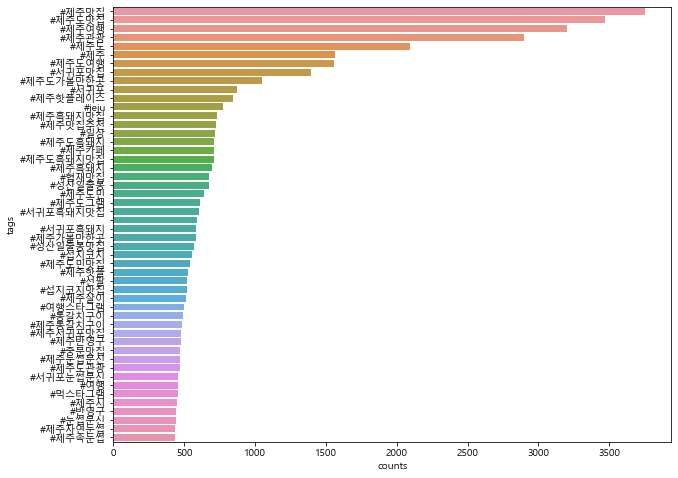

In [28]:
plt.figure(figsize=(10, 8)) # figure == 도화지같은 개념 
sns.barplot(x='counts', y='tags', data=jejuDf)

In [ ]:
# 날짜별로 평균을 내서 평균을 기점으로 올라가는 추세인지 낮아지는 추세인지